# Уровень самоубийств с 1985 по 2016

### **Содержание**

Источник: https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016 (дата обращения: 18.06.2023)

### **Содержание**

Этот набор данных был составлен на основе четырех других датасетов, связанных местом и временем, и был создан для поиска сигналов, коррелирующих с увеличением уровня суицидов среди различных когорт по всему миру, во всем социально-экономическом спектре.

### **Ссылки**

Программа развития Организации Объединенных Наций. (2018). Индекс человеческого развития (ИЧР). Получено с http://hdr.undp.org/en/indicators/137506

Всемирный банк. (2018). Индикаторы мирового развития: ВВП (текущие доллары США) по странам: 1985-2016. Получено с http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Суицид в XXI веке [набор данных]. Получено с https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

Всемирная организация здравоохранения. (2018). Профилактика суицида. Получено с http://www.who.int/mental_health/suicide-prevention/en/

### **Вдохновение**

Профилактика суицида.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('master.csv')

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


**Данные:**



*   `country` - страна, в которой проводилось наблюдение
*   `year` - год, в который проводилось наблюдение
*   `sex` - пол самоубийц
*   `age` - возраст самоубийц
*   `suicides_no` - количество самоубийств в данной категории
*   `population` - население в стране на момент, когда было совершено самоубийство
*   `suicides/100k pop` - количество самоубийств на 100 тысяч населения
*   `country-year` - год, который был тогда в стране
*   `HDI for year` - индекс развития человеческого капитала страны в текущий период
*   `gdp_for_year ($)` - ВВП страны в текущий год
*   `gdp_per_capita ($)` - ВВП на душу населения
*   `generation` - поколение, к которому принадлежали самоубийцы












**Поколения, которые выделяет автор датасета:**



*  **G.I. Generation** - Великое поколение, иногда «Величайшее поколение» — собирательное название, данное американским журналистом Томом Брокау поколению американцев, которое воспитывалось во времена Великой депрессии и затем участвовало в боях Второй мировой войны, либо же трудилось в тылу во имя общей победы Союзников.
*   **Silent** - молчаливое поколение — поколение людей, родившихся примерно с 1928 по 1945 год, следующее за Великим поколением и предшествующее беби-бумерам
*   **Boomers** - бэби-бумеры, либо просто бумеры, представляют собой демографическую когорту, следующую за молчаливым поколением и предшествующую поколению X. Сюда относятся люди, родившиеся с 1946 по 1964 год во время бэби-бума середины 20-го века.
*   **Generation X** - поколение X — термин, применяемый к поколению людей, родившихся примерно с 1965 по 1980 год.
*   **Millenials** - поколение Y, или поколение Милле́ниума, также поколение «некст», сетевое поколение — поколение людей, родившихся примерно с 1981 по 1996 год.
*   **Generation Z** - поколение Z, включающее людей, родившихся примерно с 1997 по 2012 год.









# Часть 1

### Интересно исследовать, как имеющиеся показатели (страна, возрастная когорта, поколение, определённый год в истории, население, экономическое благосостояние страны) влияют на уровень суицидального поведения. Есть ли какие-то более явные предикторы, которые могли бы помочь более точно предсказывать регионы / страны с высоким уровнем суицидального поведения для его предотвращения?



**Работаем с данными. Избавляемся от пропусков**

In [ ]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [ ]:
df.isna().sum().sum()/df['HDI for year'].shape[0]

0.699352983465133

**В переменной `HDI for year` целых 70% пропусков. Заменим их на медианное значение столбца**

In [ ]:
median = df['HDI for year'].median()
df['HDI for year'].fillna(median, inplace=True)

In [ ]:
df.isna().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        27820 non-null  float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


**Пропусков больше нет. Однако не все переменные соответствуют нужному формату. Нам интересно  исследовать ещё и показатель ВВП/год. Для этого приведём его к целочисленному виду**

In [ ]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].astype(str).str.replace(',', '')

In [ ]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        27820 non-null  float64
 9    gdp_for_year ($)   27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


**Изучим матрицу корреляции, чтобы перед разбивкой на группы удалить лишние переменные**

In [ ]:
corr_matrix = df.corr()

highlighted_matrix = corr_matrix.style.background_gradient(cmap='coolwarm', vmin=0.5, vmax=1)

display(highlighted_matrix)

<ipython-input-337-9fa7dbcbb519>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.202184,0.094529,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.063224,0.430096,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.057240,0.710697,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.037894,0.025240,0.001785
HDI for year,0.202184,0.063224,0.057240,0.037894,1.000000,0.196978,0.502250
gdp_for_year ($),0.094529,0.430096,0.710697,0.025240,0.196978,1.000000,0.303405
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.502250,0.303405,1.000000


In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.779,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.779,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.779,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.779,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.779,2156624900,796,Boomers


**Удаляем столбцы gdp_for_year ($) и suicides_no, так как они коррелируют с другими переменными (чем больше население, тем, банально, выше и эти показатели). Столбец country-year тоже удалеяем, так как он дублирует информацию о годе и не несёт значимости для исследования**

In [ ]:
df.drop(columns = ['suicides_no', 'country-year', ' gdp_for_year ($) '], axis=1, inplace=True)

In [ ]:
df.head()

,country,year,sex,age,population,suicides/100k pop,HDI for year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,312900,6.71,0.779,796,Generation X
1,Albania,1987,male,35-54 years,308000,5.19,0.779,796,Silent
2,Albania,1987,female,15-24 years,289700,4.83,0.779,796,Generation X
3,Albania,1987,male,75+ years,21800,4.59,0.779,796,G.I. Generation
4,Albania,1987,male,25-34 years,274300,3.28,0.779,796,Boomers


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   population          27820 non-null  int64  
 5   suicides/100k pop   27820 non-null  float64
 6   HDI for year        27820 non-null  float64
 7   gdp_per_capita ($)  27820 non-null  int64  
 8   generation          27820 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.9+ MB


**Переводим категориальные переменные в дамми-переменные, чтобы оценить их влияние на целевую переменную**

In [ ]:
data = pd.get_dummies(df)

In [ ]:
data.head()

,year,population,suicides/100k pop,HDI for year,gdp_per_capita ($),country_Albania,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,...,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,312900,6.71,0.779,796,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1987,308000,5.19,0.779,796,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1987,289700,4.83,0.779,796,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1987,21800,4.59,0.779,796,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1987,274300,3.28,0.779,796,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Часть 2

### В данном случае мы предсказываем уровень суицидального поведения по определённому набору предикторов. Для его определения нам нужно использовать модели регрессии.

### Такие модели пытаются предсказать непрерывную величину, такую как цена на недвижимость или количество продаж. Таким образом, выходные данные являются числовыми. Для решения задачи будем использовать такие алгоритмы, как линейная регрессия, деревья решений и случайный лес*.

In [ ]:
import seaborn as sns

**Распределение целевой переменной. Низких показателей суицидального поведения заметно больше в выборке (и слава богу!)**

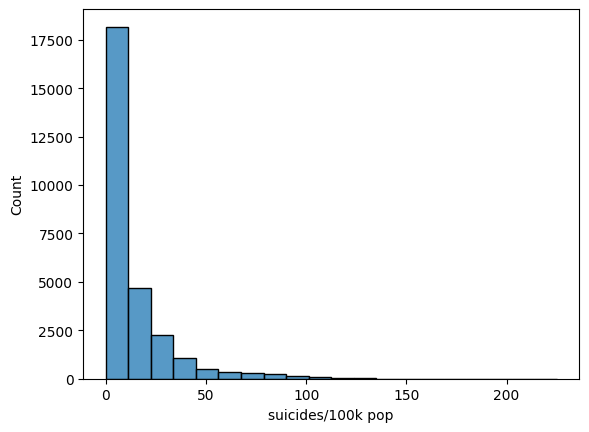

In [ ]:
sns.histplot(df['suicides/100k pop'], bins=20);

### Связь категориальных переменных с целевой

**Количество случаев суицида по поколениям**

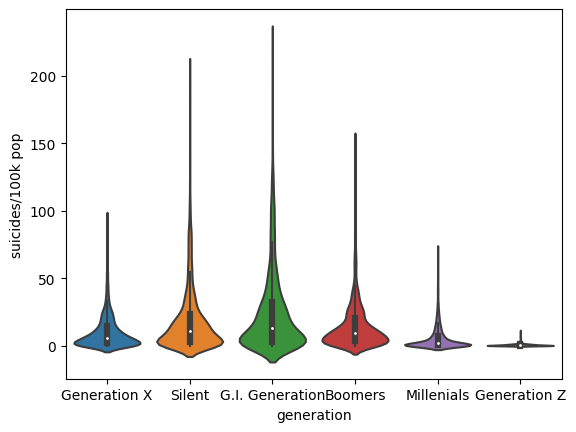

In [ ]:
sns.violinplot(x = 'generation', y = 'suicides/100k pop', data = df, scale='width');

**При этом таково распределение поколений в выборке. Видно, что "великого поколения" было меньше всего в выборке, однако его представители пострадали от суицидальных настроений больше всего**

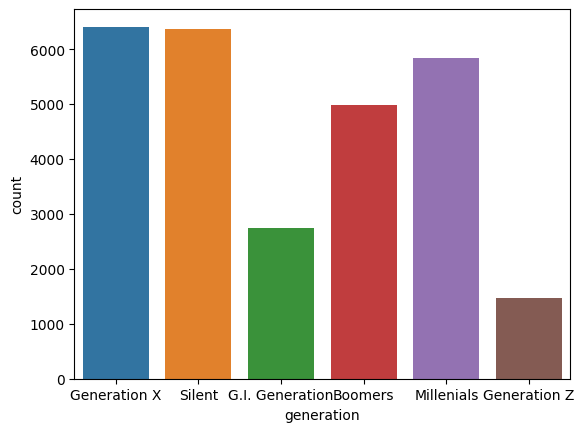

In [ ]:
sns.countplot(x = 'generation', data = df);

**Зависимость от возрастных когорт. Меньше всего от суицидального поведения страдают люди в возрасте от 5 до 14 лет**

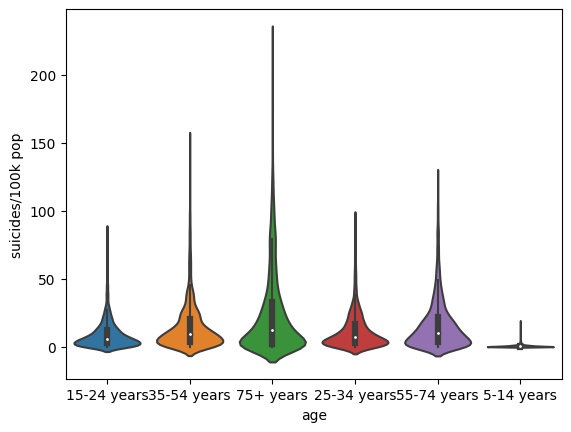

In [ ]:
sns.violinplot(x = 'age', y = 'suicides/100k pop', data = df, scale='width');

**Их распределение. Все равны**

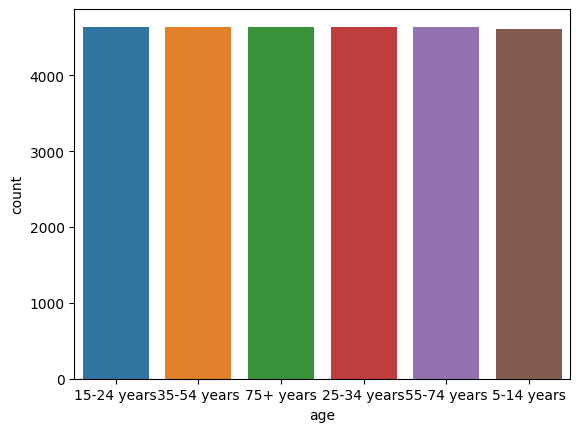

In [ ]:
sns.countplot(x = 'age', data = df);

**Самоубийства среди женщин и мужчин, а также их распределение в выборке**

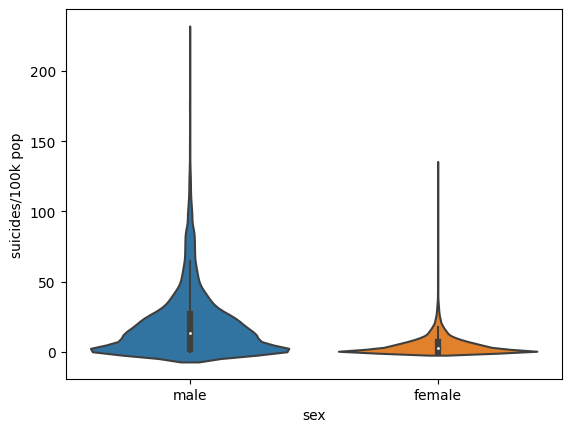

In [ ]:
sns.violinplot(x = 'sex', y = 'suicides/100k pop', data = df, scale='width');

**Несмотря на равное распределение в выборке, больше всего суицидальному поведению подвержены мужчины**

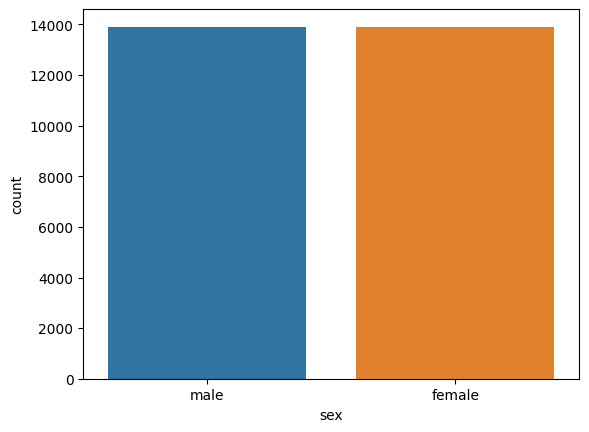

In [ ]:
sns.countplot(x = 'sex', data = df);

### Связь числовых переменных с целевой переменной

**Отношение количества суицидов на 100к население к индексу человеческого капитала. Количество суицидов в целом больше в странах со средним (upper-middle) уровнем HDI**

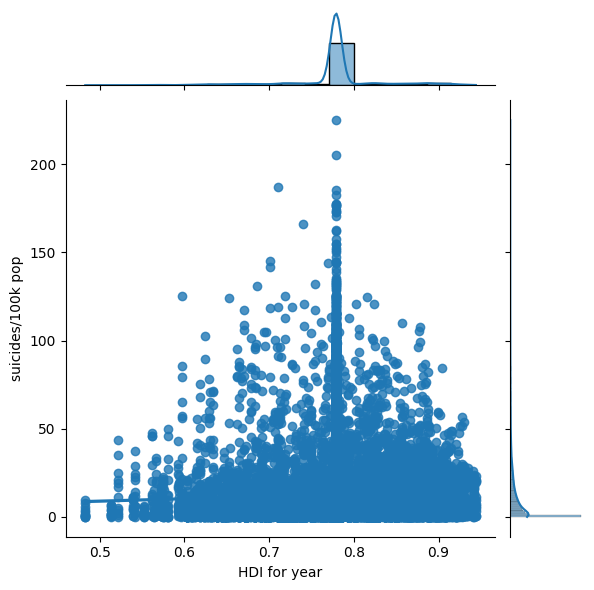

In [ ]:
sns.jointplot(data = df, x = 'HDI for year', y = 'suicides/100k pop', kind = 'reg');

**Отношение количества суицидов на 100к человек к численности населения. В странах с маленькой численностью населения больше всего суицидов**

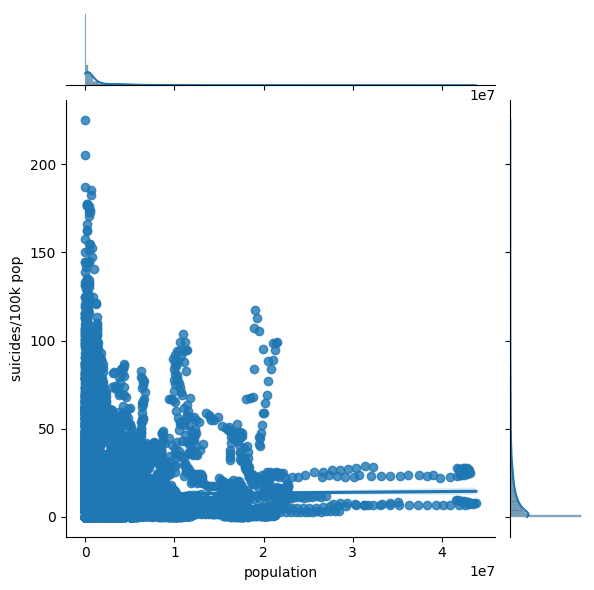

In [ ]:
sns.jointplot(data = df, x = 'population', y = 'suicides/100k pop', kind = 'reg');

**Отношение количества суицидов на 100к человек к уровню ВВП на душу населения. Видно, что с увеличением благосостояния страны снижается уровень самоубийств**

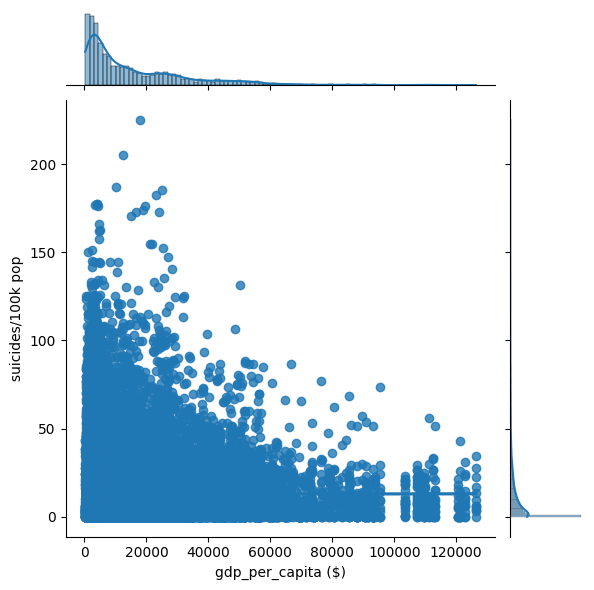

In [ ]:
sns.jointplot(data = df, x = 'gdp_per_capita ($)', y = 'suicides/100k pop', kind = 'reg');

**Количество суицидов по годам. Видно, что в определённые годы были страны с максимально низким уровнем суицидального поведения**

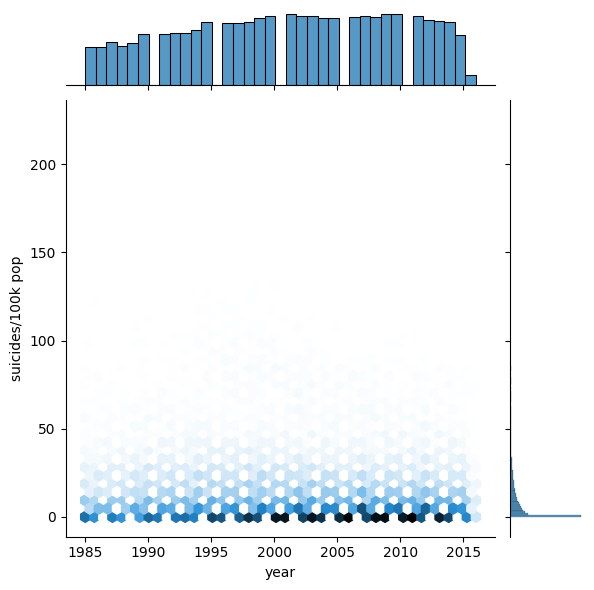

In [ ]:
sns.jointplot(data = df, x = 'year', y = 'suicides/100k pop', kind = 'hex');

### Поколения и количество суицидов по годам

**Часть поколений имеет белые ячейки, так как их физически не существовало в это время. Заметно, что по мере взросления практически во всех поколенческих группах растёт уровень суицидов (только с разной скоростью).**

In [ ]:
pvflights = df.pivot_table(values = 'suicides/100k pop', index = 'generation', columns = 'year')

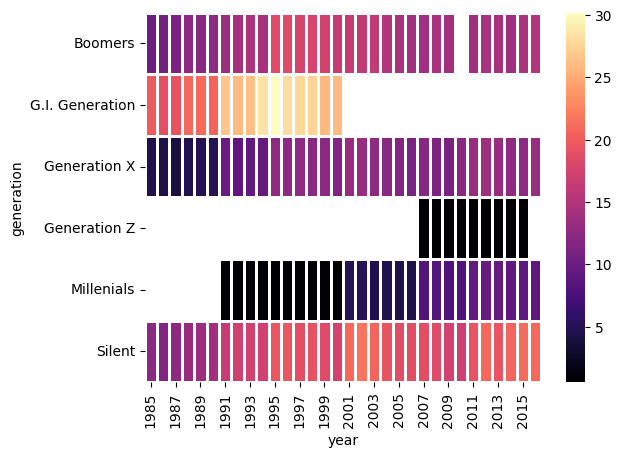

In [ ]:
sns.heatmap(pvflights, linecolor = 'white', linewidths = 1, cmap = 'magma');

**Удаляем выбросы и нормализуем независимые переменные**

In [ ]:
Q1 = data['HDI for year'].quantile(0.25)
Q3 = data['HDI for year'].quantile(0.75)
IQR = Q3 - Q1

data = data[(data['HDI for year'] >= Q1 - 1.5*IQR) & (data['HDI for year'] <= Q3 + 1.5*IQR)]

In [ ]:
Q1 = data['population'].quantile(0.25)
Q3 = data['population'].quantile(0.75)
IQR = Q3 - Q1

data = data[(data['population'] >= Q1 - 1.5*IQR) & (data['population'] <= Q3 + 1.5*IQR)]

In [ ]:
Q1 = data['gdp_per_capita ($)'].quantile(0.25)
Q3 = data['gdp_per_capita ($)'].quantile(0.75)
IQR = Q3 - Q1

data = data[(data['gdp_per_capita ($)'] >= Q1 - 1.5*IQR) & (data['gdp_per_capita ($)'] <= Q3 + 1.5*IQR)]

**После того, как удалили выбросы, делим выборку на обучающую и тестовую**

In [ ]:
y = data['suicides/100k pop']
X = data.drop(columns=['suicides/100k pop'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

**Нормализуем признаки, так как они представлены в разных шкалах**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

**На уровень суицида больше всего влияют (гипотеза):**



*   Возрастная группа, к которой принадлежит человек (чем старше, тем грустнее)

*   Экономическое благосотояние страны (чем богаче, тем меньше суицидальных мыслей)

*   Определённый год в истории (год, в который случаются крупные трагедии или "эпидемии" суицида вроде эффекта Вертера; или наоборот очень спокойный год)






# Часть 3

#### В задаче регрессии используются различные метрики для оценки качества модели, такие как средняя квадратическая ошибка (MSE), RMSE и коэффициент детерминации (R-квадрат). В нашем случае основной метрикой будет R-квадрат, так как он показывает, какую долю дисперсии (изменчивости) в данных объясняет модель. Чем выше значение R-квадрата (в пределах от 0 до 1), тем лучше модель соответствует данным

**Импортируем метрики и строим навиную модель предсказания по медиане**

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
y_mean = np.mean(y)
y_pred_naive = np.ones(len(y)) * y_mean
y_pred_naive[:5]

array([13.24346395, 13.24346395, 13.24346395, 13.24346395, 13.24346395])

**При построении наивного прогноза модели совсем не удаётся предсказывать реальные данные**

In [ ]:
r2_score(y, y_pred_naive)

0.0

### Линейная регрессия

**Линейная регрессия - это простой и эффективный метод для решения задачи регрессии, который основан на линейной зависимости между независимыми и зависимыми переменными. Он позволяет прогнозировать значения зависимой переменной на основе значений одной или нескольких независимых переменных**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_norm, y_train)
pred = model.predict(X_test_norm)

In [ ]:
rmse(y_test, pred)

14.074567927041272

**Показатели r-квдрата уже выше. Модель справляется с предсказанием в 53% случаев**

In [ ]:
r2_score(y_test, pred)

0.5265206514160381

### Работа с деревом решений

**Деревья решений - это метод, который может быть использован для решения задачи регрессии. Дерево решений представляет собой структуру, состоящую из глубины (depth) и листьев (leaves), которая позволяет классифицировать или прогнозировать значения зависимой переменной на основе значений одной или нескольких независимых переменных**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeRegressor(
    random_state=42
)
dt.fit(X_train_norm, y_train)
y_train_pred = dt.predict(X_train_norm)
print('Train: {:.2f}'.format(metrics.r2_score(y_train, y_train_pred)))
y_test_pred = dt.predict(X_test_norm)
print('Test: {:.2f}'.format(metrics.r2_score(y_test, y_test_pred)))

Train: 1.00
Test: 0.82


**R-квадрат уже значительно лучше. Модель правильно угадывает 82% на тестовых данных**

### Пробуем модель случайного леса

Случайный лес - это метод, основанный на ансамбле решающих деревьев, который используется для решения задачи регрессии. Он строит множество деревьев решений и комбинирует их ответы, чтобы получить более точные прогнозы. Случайный лес обладает высокой точностью и устойчивостью к шуму в данных

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train_norm, y_train)

y_train_pred = rf.predict(X_train_norm)
print('Train: {:.2f}'.format(metrics.r2_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test_norm)
print('Test: {:.2f}'.format(metrics.r2_score(y_test, y_test_pred)))

Train: 0.98
Test: 0.89


**Модель RandomForestRegressor показывает лучшие результаты. Также её предсказание отличается от оценки по среднему, так что такая модель существенно улучшает предсказания**

**При текущем наборе признаков можно предсказывать риск суицидального поведения в стране с точностью до 89%**

### Ниже представлен график значимости каждой из незавсимых переменных, которые использовались моделью. Политики, учёные и врачи могут делать более точные прогнозы, опираясь на эти признаки для предсказания уровня суицидального поведения в стране

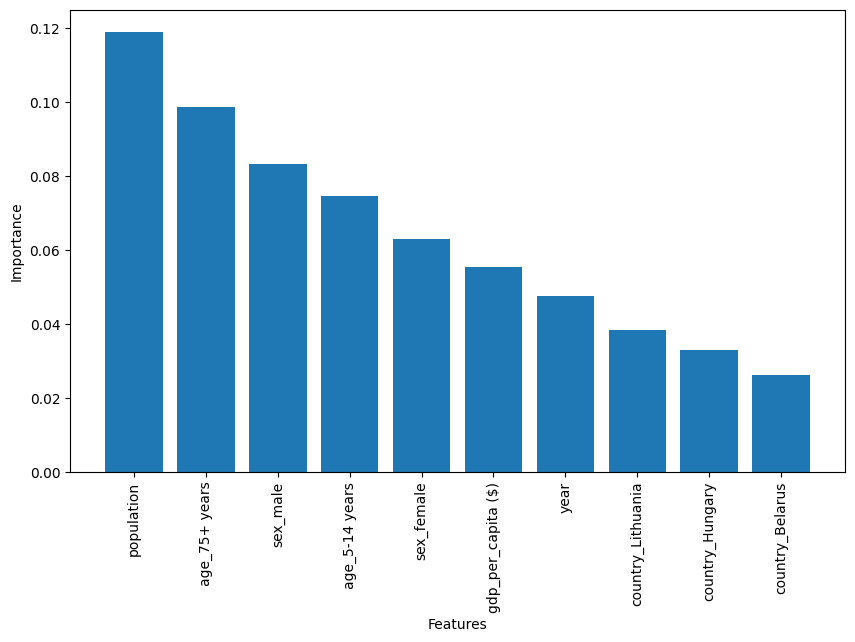

In [ ]:
importances = rf.feature_importances_
feature_names = X.columns

# Сортировка признаков по важности
indices = np.argsort(importances)[::-1][:10]

# Построение гистограммы важности признаков
plt.figure(figsize=(10, 6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

**Гипотезы:**

*   Возраст группы действительно влияет на уровень суицидального поведения (75+ - самый опасный, 5-14 - минимальный риск)
*   Благосостояние действительно влияет на уровень суицидов
*   Год действительно влияет на уровень суицидов

**Новое:**

*   Численность населения влияет на вероятность суицида (судя по прошлым графикам, она выше в странах с маленьким населением). Также выше уровень суицидального поведения в следующих странах: Литва, Венгрия, Беларусь. Литва даже входила в антирейтинг стран с одним из самых высоких уровней суицида в Европе: https://borgenproject.org/lithuania-a-small-country-with-the-highest-suicide-rates-in-europe/
*   Мужчины больше предрасположены к суицидальному поведению, чем женщины





